# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [406]:
df = pd.read_excel("Raisin_Dataset.xlsx") 

In [407]:
df.head(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
5,49242,318.125,200.122,0.777,51368,0.658,881.836,Kecimen
6,42492,310.146,176.131,0.823,43904,0.666,823.796,Kecimen
7,60952,332.455,235.430,0.706,62329,0.744,933.366,Kecimen
8,42256,323.190,172.576,0.845,44743,0.698,849.728,Kecimen
9,64380,366.965,227.772,0.784,66125,0.664,981.544,Kecimen


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [409]:
df.shape

(900, 8)

In [410]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [411]:
df.duplicated().sum()

0

In [412]:
df['Class'].value_counts() 

Kecimen    450
Besni      450
Name: Class, dtype: int64

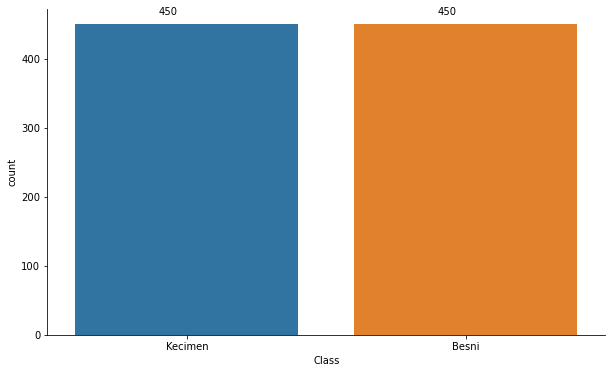

In [413]:
ax = sns.countplot(df['Class'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));


In [414]:
df["Class"] = df["Class"].replace({"Kecimen":0,"Besni":1}) 

In [415]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,0
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,0
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,0
3,45928,286.541,208.760,0.685,47336,0.700,844.162,0
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,1
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,1
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,1
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,1


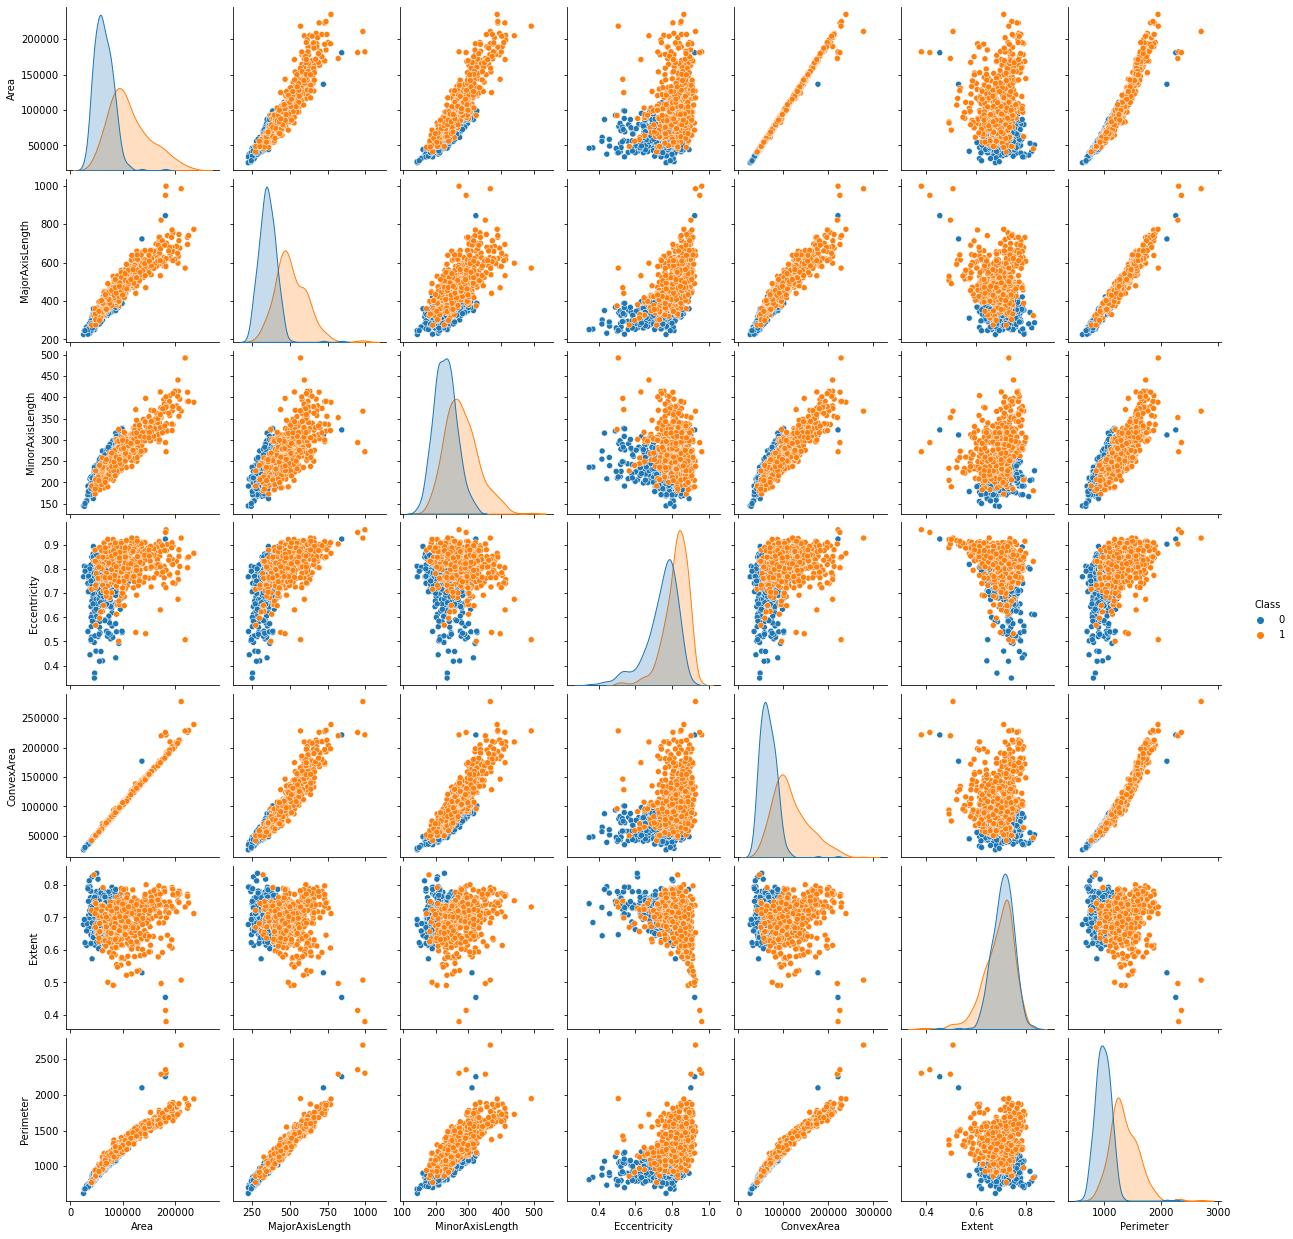

In [416]:
sns.pairplot(df,hue='Class');

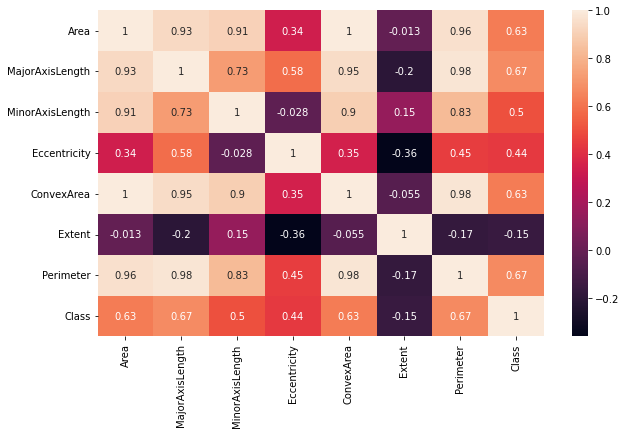

In [417]:
sns.heatmap(df.corr(),annot=True);

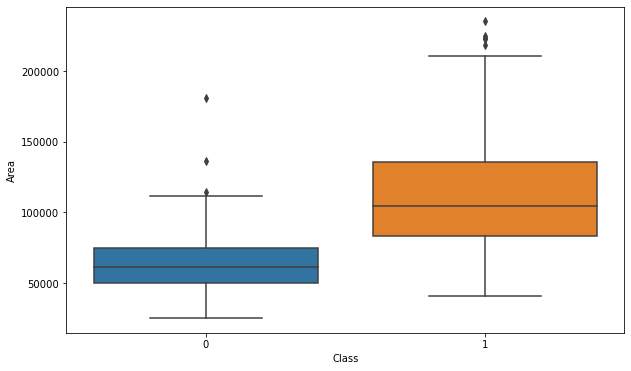

In [418]:
sns.boxplot(x = "Class", y = "Area", data = df);

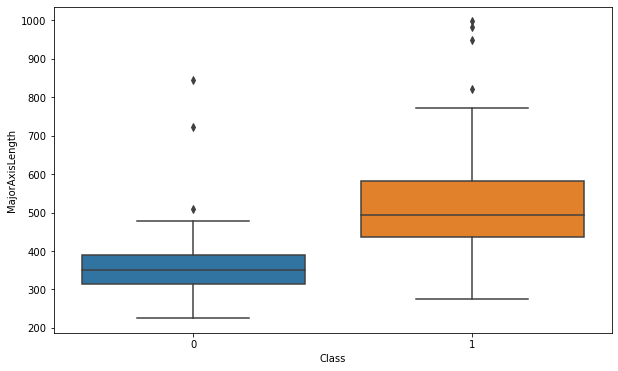

In [419]:
sns.boxplot(x = "Class", y = "MajorAxisLength", data = df);

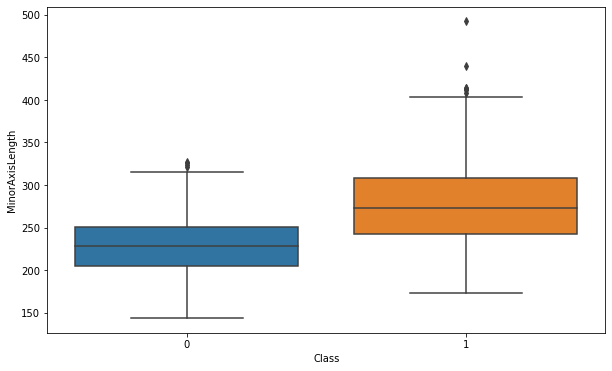

In [420]:
sns.boxplot(x = "Class", y = "MinorAxisLength", data = df);

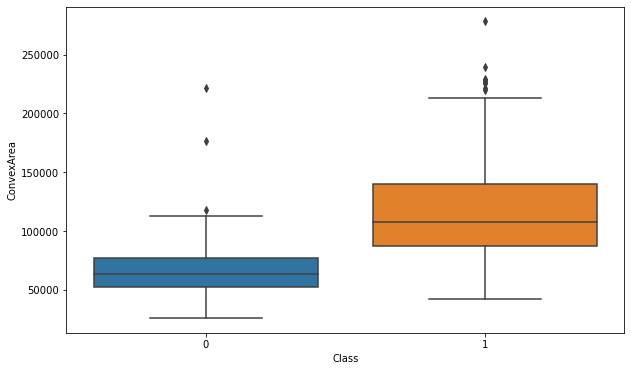

In [421]:
sns.boxplot(x = "Class", y = "ConvexArea", data = df);

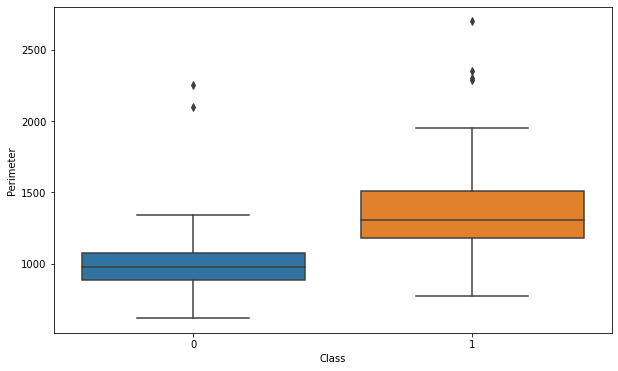

In [422]:
sns.boxplot(x = "Class", y = "Perimeter", data = df);

In [423]:
df.iplot(kind="scatter")

In [424]:
df.iplot(kind="box")

In [425]:
fig = px.scatter_3d(df, x='Area', y='Perimeter', z='Extent', color='Class')
fig.show()

## Train | Test Split and Scaling

In [426]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [428]:
X_train

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
276,77043,388.693,257.546,0.749,80094,0.727,1112.212
386,65123,382.358,218.889,0.820,66825,0.764,1018.353
636,105347,476.804,282.026,0.806,108072,0.769,1266.876
226,88724,446.430,260.379,0.812,92630,0.657,1216.535
439,98485,387.763,325.737,0.543,100682,0.730,1193.908
...,...,...,...,...,...,...,...
704,128107,616.994,267.981,0.901,133001,0.621,1513.469
870,179668,690.433,332.553,0.876,181954,0.779,1681.985
532,82161,441.796,246.810,0.829,86909,0.630,1222.158
770,131496,506.115,334.332,0.751,134210,0.706,1412.020


In [429]:
X_test

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
375,65999,326.299,264.415,0.586,67971,0.677,998.793
793,76708,458.045,216.341,0.881,78694,0.658,1135.680
360,48809,332.265,190.351,0.820,51847,0.661,928.016
77,42637,293.430,189.432,0.764,44052,0.725,814.182
686,61539,364.256,220.362,0.796,65462,0.723,1056.491
...,...,...,...,...,...,...,...
73,68520,373.236,237.042,0.772,70759,0.713,1049.093
62,78571,443.822,228.758,0.857,81718,0.642,1157.330
292,72219,376.650,249.529,0.749,74373,0.778,1050.221
508,133101,641.510,265.314,0.910,136793,0.582,1544.712


In [430]:
y_train

276    0
386    0
636    1
226    0
439    0
      ..
704    1
870    1
532    1
770    1
102    0
Name: Class, Length: 720, dtype: int64

In [431]:
y_test

375    0
793    1
360    0
77     0
686    1
      ..
73     0
62     0
292    0
508    1
112    0
Name: Class, Length: 180, dtype: int64

# Logistic Regression

In [432]:
scaler = StandardScaler()

In [433]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [434]:
log_model = LogisticRegression()

In [435]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [436]:
log_model.coef_

array([[ 0.1061352 ,  1.03789291, -1.46242173, -0.24130596,  1.09846161,
        -0.2265741 ,  2.68072308]])

In [437]:
y_pred = log_model.predict(X_test_scaled)
y_pred 

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0])

In [438]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.09233226e-01, 9.07667744e-02],
       [2.13923600e-01, 7.86076400e-01],
       [8.61366061e-01, 1.38633939e-01],
       [9.75006614e-01, 2.49933859e-02],
       [7.18428741e-01, 2.81571259e-01],
       [9.78090204e-01, 2.19097960e-02],
       [9.67153729e-01, 3.28462709e-02],
       [2.69784269e-01, 7.30215731e-01],
       [6.22413524e-01, 3.77586476e-01],
       [8.28165778e-01, 1.71834222e-01],
       [5.50087417e-01, 4.49912583e-01],
       [6.48124125e-01, 3.51875875e-01],
       [1.33636635e-03, 9.98663634e-01],
       [7.34673174e-03, 9.92653268e-01],
       [2.22192344e-04, 9.99777808e-01],
       [4.06025195e-03, 9.95939748e-01],
       [1.03563509e-04, 9.99896436e-01],
       [2.05679569e-01, 7.94320431e-01],
       [8.80378670e-01, 1.19621330e-01],
       [7.27309014e-01, 2.72690986e-01],
       [9.54065988e-01, 4.59340125e-02],
       [6.00635256e-04, 9.99399365e-01],
       [7.48381106e-01, 2.51618894e-01],
       [9.86770325e-01, 1.32296753e-02],
       [2.814178

In [439]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
375,65999,326.299,264.415,0.586,67971,0.677,998.793,0
793,76708,458.045,216.341,0.881,78694,0.658,1135.680,1
360,48809,332.265,190.351,0.820,51847,0.661,928.016,0
77,42637,293.430,189.432,0.764,44052,0.725,814.182,0
686,61539,364.256,220.362,0.796,65462,0.723,1056.491,1
...,...,...,...,...,...,...,...,...
73,68520,373.236,237.042,0.772,70759,0.713,1049.093,0
62,78571,443.822,228.758,0.857,81718,0.642,1157.330,0
292,72219,376.650,249.529,0.749,74373,0.778,1050.221,0
508,133101,641.510,265.314,0.910,136793,0.582,1544.712,1


In [440]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
375,65999,326.299,264.415,0.586,67971,0.677,998.793,0,0.091
793,76708,458.045,216.341,0.881,78694,0.658,1135.680,1,0.786
360,48809,332.265,190.351,0.820,51847,0.661,928.016,0,0.139
77,42637,293.430,189.432,0.764,44052,0.725,814.182,0,0.025
686,61539,364.256,220.362,0.796,65462,0.723,1056.491,1,0.282
...,...,...,...,...,...,...,...,...,...
73,68520,373.236,237.042,0.772,70759,0.713,1049.093,0,0.242
62,78571,443.822,228.758,0.857,81718,0.642,1157.330,0,0.777
292,72219,376.650,249.529,0.749,74373,0.778,1050.221,0,0.170
508,133101,641.510,265.314,0.910,136793,0.582,1544.712,1,1.000


In [441]:
test_data["pred"] = y_pred
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
375,65999,326.299,264.415,0.586,67971,0.677,998.793,0,0.091,0
793,76708,458.045,216.341,0.881,78694,0.658,1135.680,1,0.786,1
360,48809,332.265,190.351,0.820,51847,0.661,928.016,0,0.139,0
77,42637,293.430,189.432,0.764,44052,0.725,814.182,0,0.025,0
686,61539,364.256,220.362,0.796,65462,0.723,1056.491,1,0.282,0
...,...,...,...,...,...,...,...,...,...,...
73,68520,373.236,237.042,0.772,70759,0.713,1049.093,0,0.242,0
62,78571,443.822,228.758,0.857,81718,0.642,1157.330,0,0.777,1
292,72219,376.650,249.529,0.749,74373,0.778,1050.221,0,0.170,0
508,133101,641.510,265.314,0.910,136793,0.582,1544.712,1,1.000,1


In [442]:
test_data.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
156,45962,251.133,235.368,0.349,47173,0.742,810.195,0,0.013,0
500,143386,469.277,397.310,0.532,146328,0.750,1422.014,1,0.819,1
123,55787,333.703,226.951,0.733,59520,0.689,977.425,0,0.113,0
143,50445,308.359,208.855,0.736,51555,0.723,851.632,0,0.032,0
639,61123,329.330,257.268,0.624,70556,0.723,1128.077,1,0.264,0
443,68931,381.672,231.528,0.795,71336,0.679,1067.692,0,0.352,0
33,61600,350.183,225.843,0.764,63397,0.747,972.472,0,0.105,0
200,63452,334.846,243.236,0.687,64925,0.735,945.523,0,0.059,0
536,81604,528.586,204.740,0.922,87172,0.491,1299.386,1,0.992,1
320,61289,376.375,208.728,0.832,63997,0.639,998.470,0,0.305,0


In [443]:
test_data.groupby('Class').pred.value_counts()

Class  pred
0      0       81
       1        9
1      1       76
       0       14
Name: pred, dtype: int64

## Model Performance

In [444]:
accuracy_score(y_test, y_pred)

0.8722222222222222

In [445]:
precision_score(y_test, y_pred)

0.8941176470588236

In [446]:
recall_score(y_test, y_pred,)

0.8444444444444444

In [447]:
f1_score(y_test,y_pred)

0.8685714285714287

In [448]:
confusion_matrix(y_test,y_pred)

array([[81,  9],
       [14, 76]])

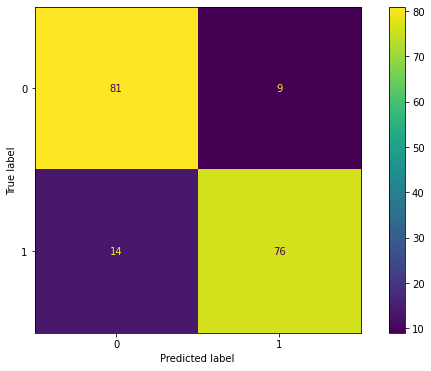

In [449]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [450]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [451]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



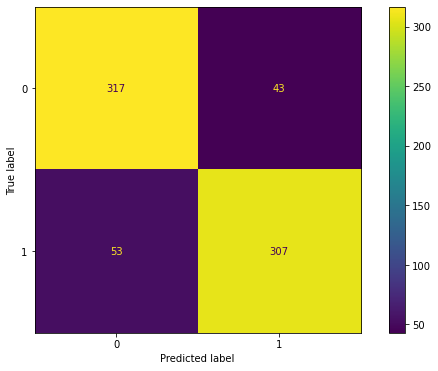

In [452]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

In [453]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [454]:
from sklearn.metrics import confusion_matrix, classification_report

In [455]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [456]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [457]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [458]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10 ,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.009,0.002,0.875,0.870,0.935,0.885,0.806,0.852,0.866,0.868
2,0.010,0.002,0.847,0.867,0.857,0.879,0.833,0.852,0.845,0.865
3,0.012,0.002,0.861,0.870,0.842,0.887,0.889,0.849,0.865,0.868
4,0.008,0.002,0.819,0.869,0.767,0.879,0.917,0.855,0.835,0.867
5,0.009,0.002,0.861,0.869,0.933,0.877,0.778,0.858,0.848,0.867
6,0.008,0.002,0.847,0.867,0.903,0.870,0.778,0.864,0.836,0.867
7,0.010,0.002,0.931,0.863,0.943,0.875,0.917,0.846,0.930,0.860
8,0.010,0.003,0.847,0.869,0.805,0.882,0.917,0.852,0.857,0.867
9,0.010,0.003,0.847,0.866,0.857,0.871,0.833,0.858,0.845,0.865
10,0.009,0.003,0.903,0.864,0.968,0.876,0.833,0.849,0.896,0.862


In [459]:
df_scores.mean()[2:]  

test_accuracy     0.864
train_accuracy    0.867
test_precision    0.881
train_precision   0.878
test_recall       0.850
train_recall      0.853
test_f1           0.862
train_f1          0.866
dtype: float64

In [460]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[81  9]
 [14 76]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        90
           1       0.89      0.84      0.87        90

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[317  43]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.88      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### GridSearchCV

In [461]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression() 

penalty = ["l1", "l2"] 

C = np.logspace(-1, 5, 20) 

class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"] 

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver} 

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1) 

In [462]:
grid_model.fit(X_train_scaled, y_train)

/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-pack

/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/zahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [463]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [464]:
grid_model.best_index_

17

In [465]:
grid_model.best_score_

0.8652777777777778

In [466]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  

Test_Set
[[79 11]
 [10 80]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        90
           1       0.88      0.89      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[316  44]
 [ 53 307]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       360
           1       0.87      0.85      0.86       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

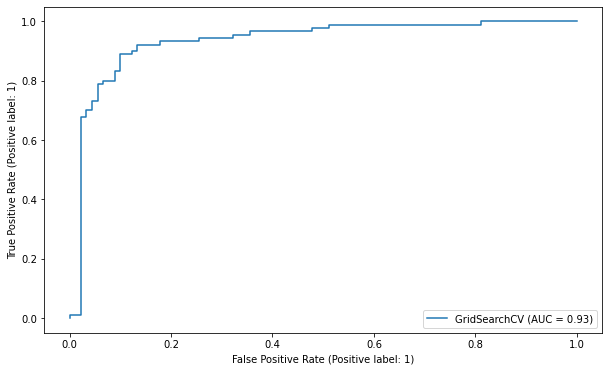

In [467]:
plot_roc_curve(grid_model, X_test_scaled, y_test); 

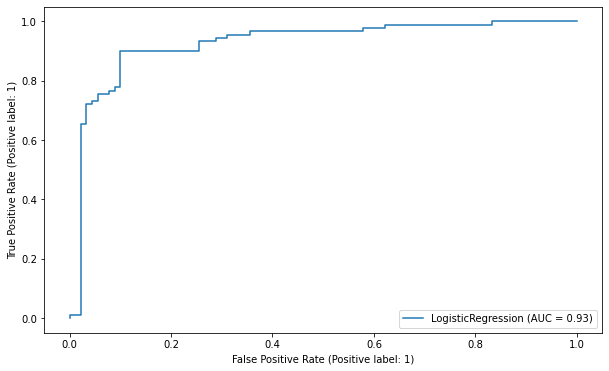

In [468]:
plot_roc_curve(log_model, X_test_scaled, y_test); 

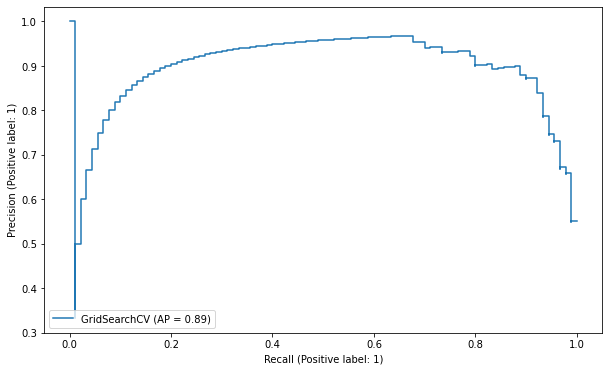

In [469]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [470]:
average_precision_score(y_test, y_pred_proba[:,1])

0.8870128026631419

# Conclusion 